In [1]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt

## Generate bivariate data with a few Gaussians of Different Means and Covariance

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  if sys.path[0] == '':


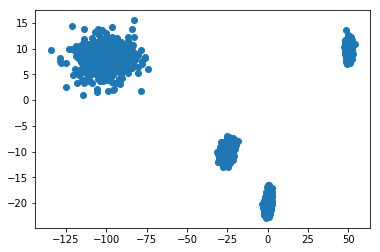

In [2]:
mean1 = [0, -20]
cov1 = [[1,0.5], [0,1]]
g1 = np.random.multivariate_normal(mean1, cov1, 500)
mean2 = [50, 10]
cov2 = [[1,0],[0,1]]
g2 = np.random.multivariate_normal(mean2, cov2, 500)
mean3 = [-100, 8]
cov3 = [[100,1.5],[1,6]]
g3 = np.random.multivariate_normal(mean3, cov3, 500)
mean4 = [-25, -10]
cov4 = [[5,0.5], [0,1]]
g4 = np.random.multivariate_normal(mean4, cov4, 500)
data = np.vstack((np.vstack((np.vstack((g1, g2)), g3)), g4))
plt.scatter(data[:,0], data[:,1])

## A Fully Vectorized Vanilla Kmean for Bivariate Data
#### Implemented as a baseline to compare with the tensor method

... 0 ... 65.80030981026397
... 1 ... 29.601063015694745
... 2 ... 47.82226746508233
... 3 ... 9.80502703121542
... 4 ... 0.0


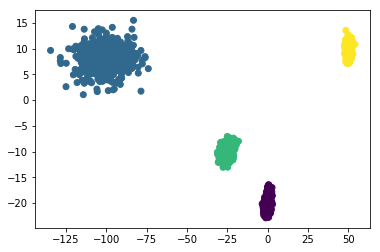

In [4]:
def bivariate_kmean(k, data, tolerance, iteration):
    means = (np.random.rand(k, 2) - 0.5)
    tol = float('inf')
    count = 0
    while (tol > tolerance and count < iteration) or count < 5:
        assignments = np.power(np.power(data - means[:,None], 2).sum(axis=2), 0.5).argmin(axis=0)
        mask = assignments == np.linspace(0,k-1,k)[:,None]
        new_means = (data * mask[...,None]).sum(axis=1) / (mask.sum(axis=1)[...,None] + 0.0001)
        tol = (((means - new_means)**2).sum())**.5
        means = new_means
        print ("...", count, "...", tol)
        count += 1
    return means, assignments

k = 4
means, assigments = bivariate_kmean(k, data, 0.000001, 100)
plt.scatter(data[:,0], data[:,1], c=assigments)

## Applying PCA to Data
#### Reduce data to one dimension and plot to visualize data projections

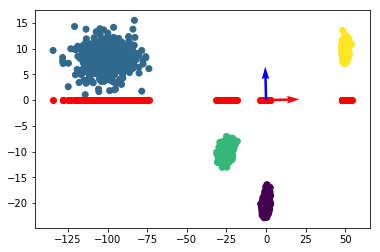

In [5]:
cov = np.cov(data.T)
w, v = np.linalg.eig(cov)
transformed_data = np.dot(data, v[0])

plt.scatter(data[:,0], data[:,1], c=assigments)
plt.scatter(transformed_data, [0]*data.shape[0], color='r')
plt.quiver([0,0], [0,0], v[:,0], v[:,1], color=['red','blue'], scale=10)

## Applying SVD to Data Cluster

In [25]:
# define a matrix
# A = np.array([
# 	[1,2,3,4,5,6,7,8,9,10],
# 	[11,12,13,14,15,16,17,18,19,20],
# 	[21,22,23,24,25,26,27,28,29,30]])
A = data.T
print(A)
# Singular-value decomposition
U, s, VT = svd(A)
# # create m x n Sigma matrix
# Sigma = np.zeros((A.shape[0], A.shape[1]))
# # populate Sigma with n x n diagonal matrix
# Sigma[:A.shape[1], :A.shape[0]] = np.diag(s)
# # select
# n_elements = 2
# Sigma = Sigma[:, :n_elements]
# VT = VT[:n_elements, :]
# # reconstruct
# B = U.dot(Sigma.dot(VT))
# print(B)
# # transform
# T = U.dot(Sigma)
# print(T)
# T = A.dot(VT.T)
# print(T)

[[  1.3510514   -1.26599442   1.37696044 ... -25.46277446 -23.38697159
  -24.8362955 ]
 [-17.9313113  -21.07397612 -22.00614556 ... -11.24907071  -8.69262234
   -9.84803143]]


In [50]:
print(U.shape, s.shape, VT.shape)
cluster = np.argmax(np.abs(VT[:4,:]), axis=0)

(2, 2) (2,) (2000, 2000)


In [51]:
cluster[cluster>1]

array([2, 2, 3], dtype=int64)

In [47]:
cluster.shape

(4,)